In [1]:
# This installs the packages needed to run the next cell. You can delete this block after executing it once.

pip install ipympl

SyntaxError: invalid syntax (1899974903.py, line 3)

In [2]:
%matplotlib widget

In [3]:
%load_ext autoreload
%autoreload 2

from sage.all import *
from utility import *

Pi = sage.symbolic.constants.pi



In [4]:
# Define here the equation defining your affine variety.
x,y,z,w = var('x, y, z, w', domain=CC)

X = ((x*z+1)^3-(y*z+1)^2)/z - 1
X = X.expand()

print(X)

x^3*z^2 + 3*x^2*z - y^2*z + 3*x - 2*y - 1


# Defining the Lefschetz Bifibration

## The fibration $\pi$

The fibre over t in C is (t - 20*x)^2*x^3 + 3*(t - 20*x)*x^2 - (t - 20*x)*y^2 + 3*x - 2*y - 1 == 0
The model fibre over 0 is 400*x^5 - 60*x^3 + 20*x*y^2 + 3*x - 2*y - 1 == 0
Critical values: 6 
Critical points: 12


/home/joel/sage/sage/sage/local/var/lib/sage/venv-python3.12.5/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


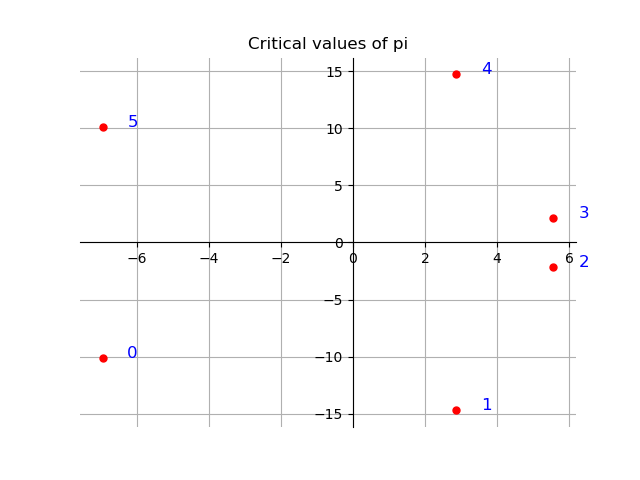

In [27]:
alpha, beta, gamma = var('alpha, beta, gamma', domain=CC)
pi = alpha*x + beta*y + gamma*z


pi = pi.subs({
    alpha: 20,
    beta: 0,
    gamma: 1
})

pi = LefschetzFibration([x,y,z], X, pi)
origin_fibre = 0
solvefor=z

t = var('t', domain=CC)

t_fibre = pi.get_fibre(t, solvefor)
print(f'The fibre over t in C is {t_fibre.simplify()==0}')
print(f'The model fibre over {origin_fibre} is {t_fibre.simplify().subs({t:origin_fibre})==0}')

crit_points_pi = pi.get_critical_points()
crit_values_pi = sort_by_angle(pi.get_critical_values(), origin_fibre)

print(f'Critical values: {len(crit_values_pi)} \nCritical points: {len(crit_points_pi)}')

plot_points_ordered(crit_values_pi, 'Critical values of pi', origin_fibre=origin_fibre)


### Criticality at Infinity

In [28]:
print(intersection_summary(pi))
intersection = intersection_at_infinity(pi)

for point in intersection:
    print(kernels(pi, point))
    print(point)

The hyperplane at infinity is given by 1.00000000000000*x^3*z^2 == 0.
The fibration vanishes at [20.0000000000000*x + 1.00000000000000*z == 0].
Their intersection consists of [{x: 0, y: 1, z: 0, w: 0}].
None
Vector space of degree 4 and dimension 2 over Symbolic Ring
Basis matrix:
[ 1.00000000000000                 0 -20.0000000000000                 0]
[                0                 1                 0                 0]
{x: 0, y: 1, z: 0, w: 0}


## The fibration $\rho$

The expression of rho over t in C is -x + 0.0600000000000000*y
Critical values: 10
Critical points: 10


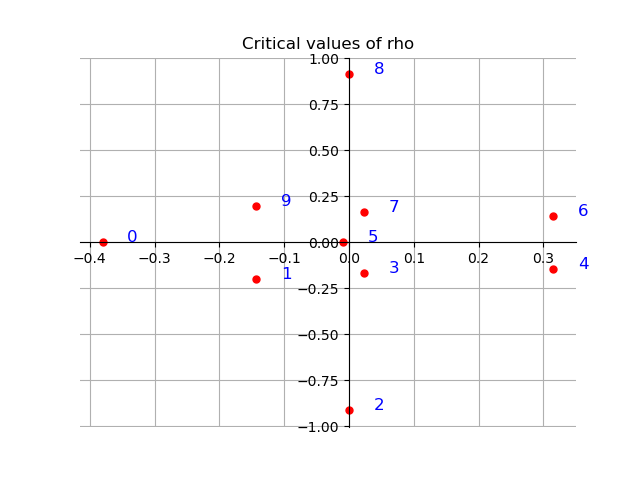

In [29]:
ar = var('ar', domain=CC)
br = var('br', domain=CC)

rho = ar*x + br*y

# rho = rho.subs({ar: 3*e^(2*Pi*I*-0.05).n(), br: 8*e^(2*I*Pi*0.08).n()})

rho = rho.subs({ar: -1, br: 0.06})
origin_fibre_rho = -0.1

rho_t = rho.subs(solvefor == t_fibre)
rho_0 = rho_t.subs(t==origin_fibre)

rho = LefschetzFibration([x,y], t_fibre.subs(t==origin_fibre), rho_0)

crit_points_rho = rho.get_critical_points()
crit_values_rho = sort_by_angle(rho.get_critical_values())

# Somehow crit values is bugging out

# a = var('a', domain=CC)
# constraints = [rho.domain==0]
# gradient_constraints = [rho.domain.diff(variable) == a*rho.fibration.diff(variable) for variable in rho.variables]
# a_solved = solve(gradient_constraints[0], a)[0]
# b = gradient_constraints[0]
# gradient_constraints = [constraint.lhs() - constraint.rhs().subs(a_solved) ==0 for constraint in gradient_constraints[1:]]
# constraints.extend(gradient_constraints)
# print(constraints)

# crit_points_rho = solve(constraints, rho.variables)
# crit_points_rho = [[expression.lhs() == expression.rhs().n() for expression in solution] for solution in crit_points_rho]
# crit_values_rho = sort_by_angle([rho(cpoint) for cpoint in crit_points_rho])

# print(crit_points_rho)

print(f'The expression of rho over t in C is {rho_t}')
print(f'Critical values: {len(crit_values_rho)}')
print(f'Critical points: {len(crit_points_rho)}')
plot_points_ordered(crit_values_rho, origin_fibre=origin_fibre_rho, title="Critical values of rho")


### Vanishing Cycles of Rho

#### Origin Fibre

1/781250*(3*y + 5.00000000000000)^5 - 3/6250*(3*y + 5.00000000000000)^3 + 2/5*(3*y + 5.00000000000000)*y^2 - 91/50*y - 0.700000000000000
[-3.34792455+61.83500704j -3.34792455-61.83500704j
 -2.22989074 +0.j         -0.31369363 +0.j
  0.90610013 +0.j        ]


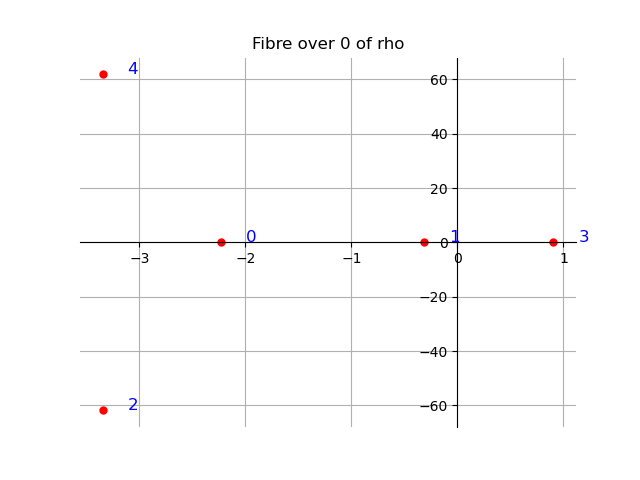

In [21]:
solvefor_rho = x

t_fibre_rho = rho.get_fibre(t,solvefor_rho)
fibre_rho_0 = t_fibre_rho.subs(t==origin_fibre_rho)
print(fibre_rho_0)

sols = NumericalRoots(fibre_rho_0)
print(sols)

plot_points_ordered(sols, origin_fibre=origin_fibre_rho, title="Fibre over 0 of rho")


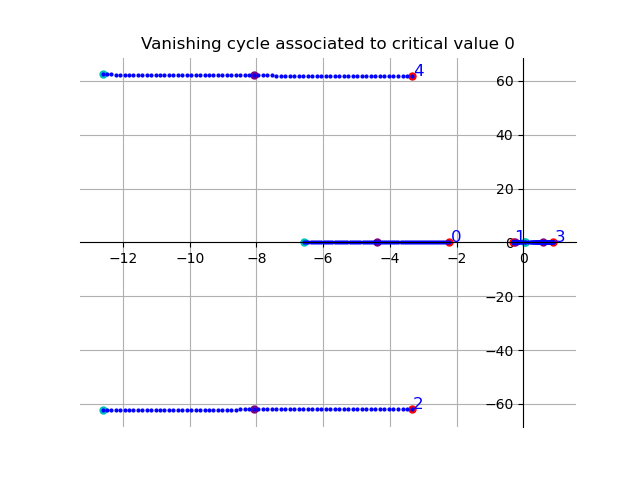

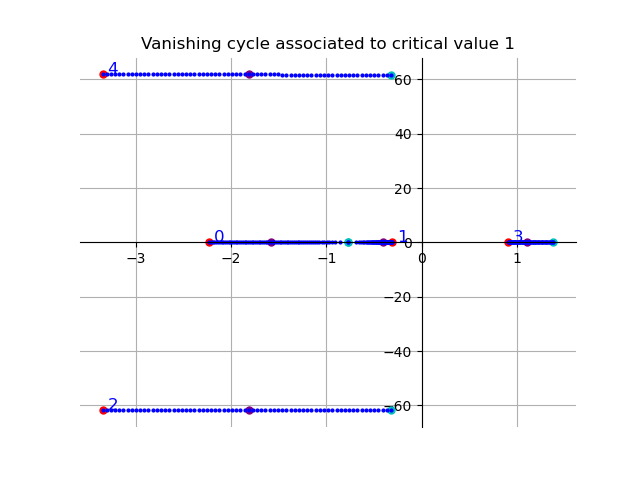

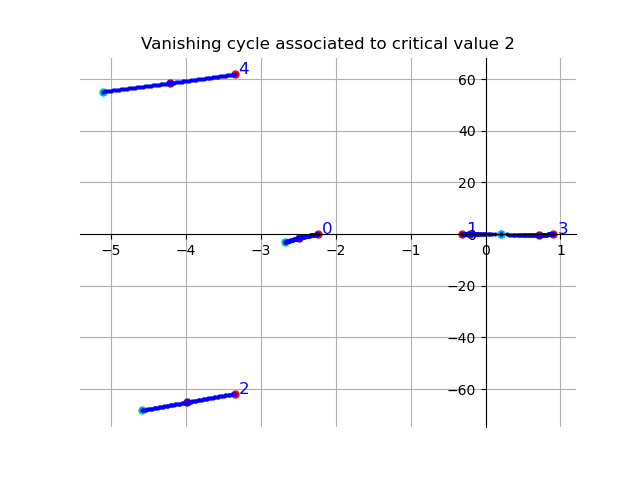

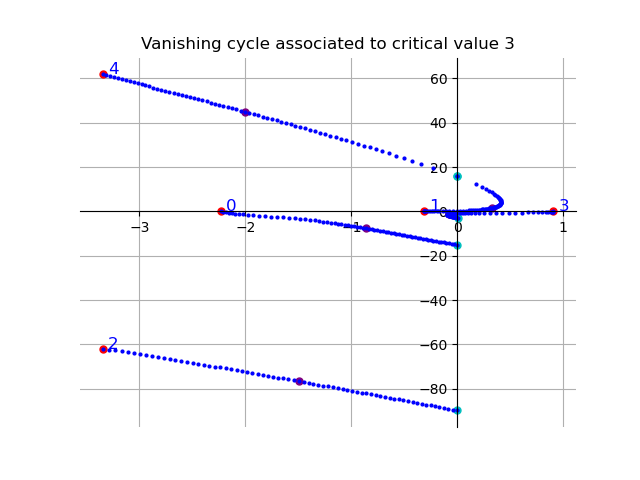

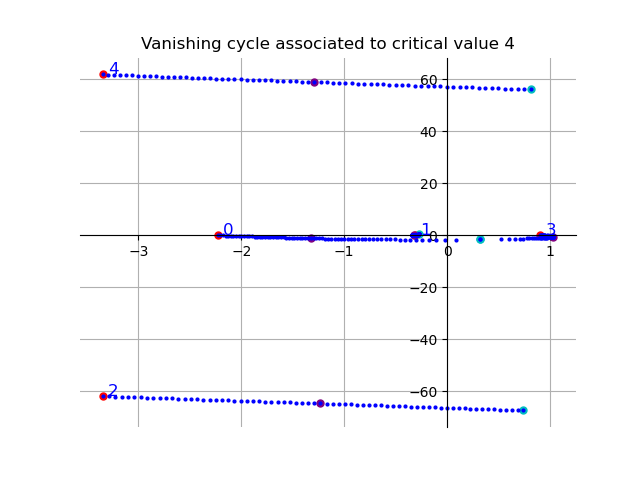

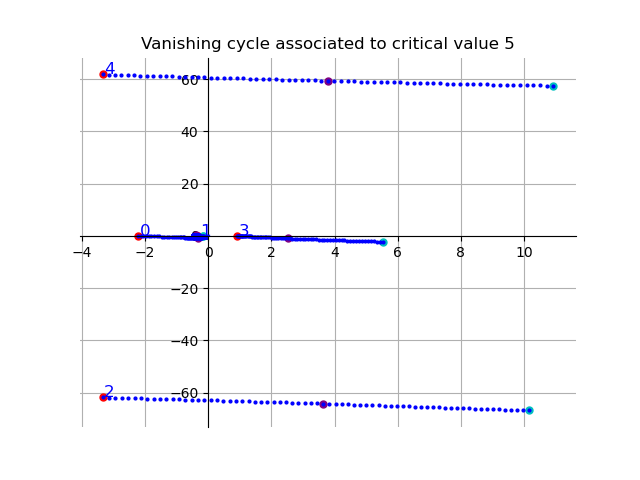

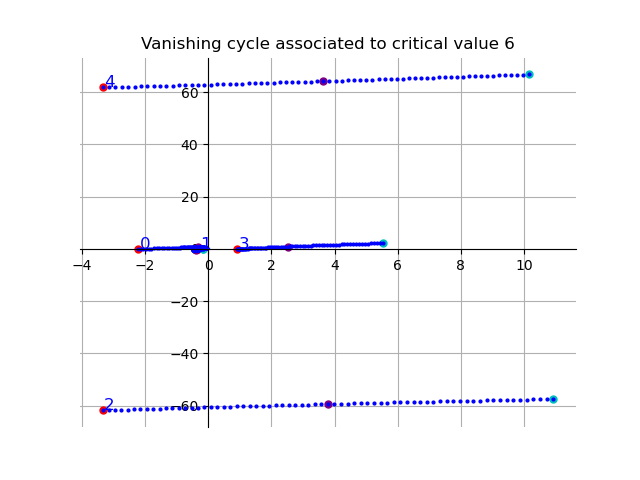

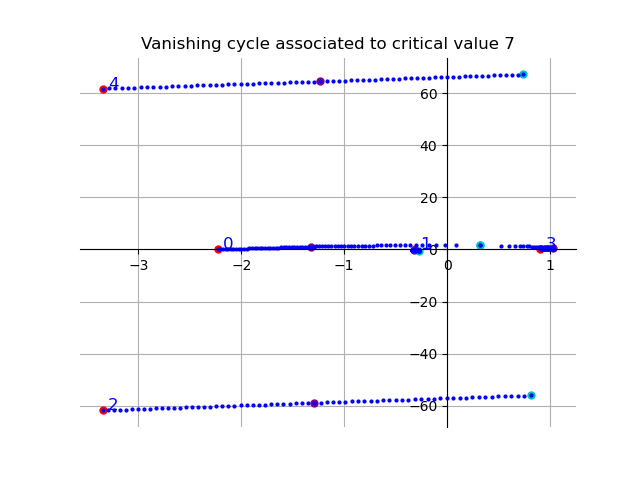

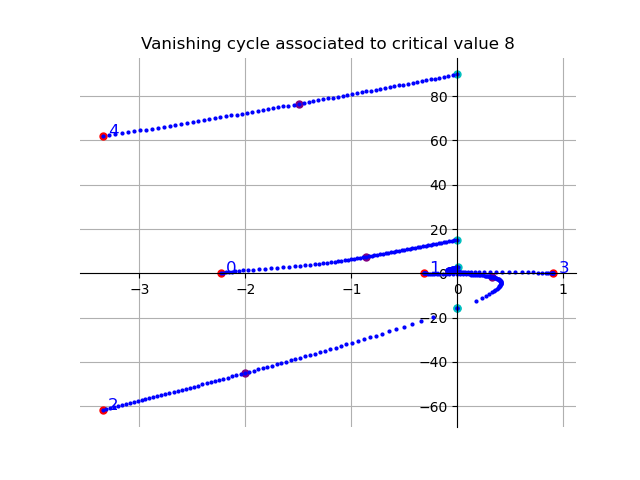

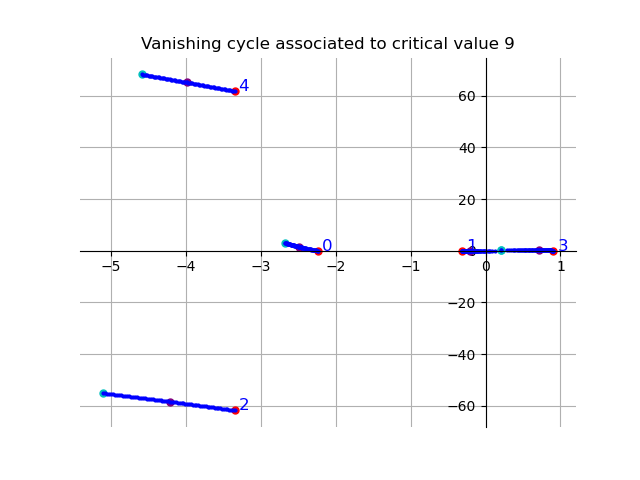

In [22]:
for (index, point) in enumerate(crit_values_rho):
    path = pl_path([origin_fibre_rho, point])
    trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Vanishing cycle associated to critical value {index}')    

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Checking sheet of matching cycle'}>)

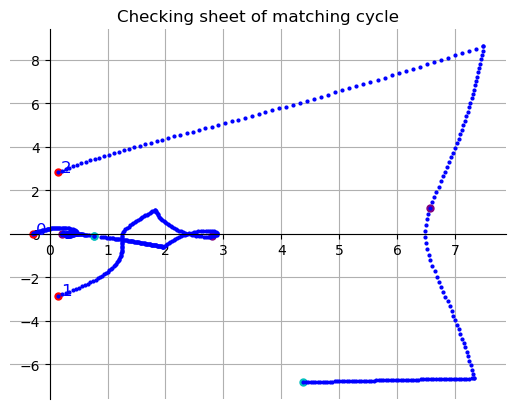

In [11]:
path = pl_path([origin_fibre_rho, 4*I+4 , -3*I+4, crit_values_rho[2]])
trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Checking sheet of matching cycle')    

In [ ]:
path = pl_path([origin_fibre_rho, 4*I+4 , 4*I, 2*I-3, crit_values_rho[0]])
trace_preimage(rho, t, path, solvefor=solvefor_rho, title=f'Checking sheet of matching cycle')    

## Matching Paths - Images of Vanishing Cycles

In [41]:
for index, crit in enumerate(crit_values_pi):
    matching = pi.get_matching_path(rho_0, origin_fibre, crit, solvefor=solvefor)
    plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

Graphics3d Object

## Additional matching paths from different choices of Vanishing Paths

In [44]:
p0 = pl_path([origin_fibre, 15*I, 15*I-10, crit_values_pi[0]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[0], solvefor=solvefor, path=p0)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object

In [46]:
p1 = pl_path([origin_fibre, -7-15*I, crit_values_pi[5]])
matching = pi.get_matching_path(rho_0, origin_fibre, crit_values_pi[5], solvefor=solvefor, path=p1)
plot_path_3d(matching, title = f'Matching path to critical value {index} of f', origin_fibre=origin_fibre_rho)

Graphics3d Object